# Proyecto 3


### GRUPO 2:
    
Marta Pizarro 202027959

Diego Quevedo 200914623

Alfredo Hincapié 199817792

Guillermo Andrade 202027949

Elber Pardo 200017815

### **Importar librerias y base de datos *train* y *test***


In [143]:
import warnings; 
warnings.simplefilter('ignore')

In [144]:
#Importar librerías y cargar la base de datos
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import nltk
from nltk.corpus import stopwords
from nltk  import word_tokenize
import string
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
english_stopwords = stopwords.words('english')
punctuation = string.punctuation

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pcmgmt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcmgmt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcmgmt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [92]:
#Importar bases
dataTrain = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

datatest = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

dataTraining = dataTrain.reset_index(drop=True)


In [3]:
#Revisar las columnas de cada dataframe
print('Variables BD Test', datatest.columns)
print('Variables BD Train',dataTraining.columns)

Variables BD Test Index(['year', 'title', 'plot'], dtype='object')
Variables BD Train Index(['year', 'title', 'plot', 'genres', 'rating'], dtype='object')


La base de Test no tiene rating de la película, de modo que se trabajara con los variables year, title, plot y base

In [93]:
#Revisión del componente del dataframe
print(dataTraining.info())
print(datatest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7895 entries, 0 to 7894
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    7895 non-null   int64  
 1   title   7895 non-null   object 
 2   plot    7895 non-null   object 
 3   genres  7895 non-null   object 
 4   rating  7895 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 308.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3383 entries, 1 to 11275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    3383 non-null   int64 
 1   title   3383 non-null   object
 2   plot    3383 non-null   object
dtypes: int64(1), object(2)
memory usage: 105.7+ KB
None


### **ANÁLISIS EXPLORATORIO**

**Datos faltantes**

In [5]:
#identificar si hay valores NAN en los datos TRAIN y TEST
print("TRAIN")
print(dataTraining.isna().sum())
print(dataTraining.shape)

print("TEST")
print(datatest.isna().sum())
print(datatest.shape)

TRAIN
year      0
title     0
plot      0
genres    0
rating    0
dtype: int64
(7895, 5)
TEST
year     0
title    0
plot     0
dtype: int64
(3383, 3)


NO se identifican valores faltantes

**Recuento de palabras en la reseña**

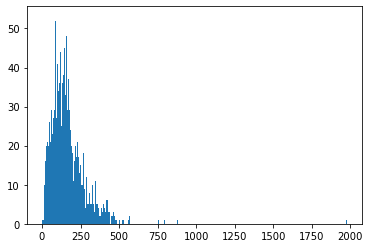

count    7895.000000
mean      160.029006
std       106.253661
min         1.000000
25%        88.000000
50%       141.000000
75%       202.000000
max      1975.000000
Name: totalwords, dtype: float64
484.119999999999


<Figure size 1440x720 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt
import numpy as np 

#Variable que cuenta el número de palabras que contiene el plot
dataTraining['totalwords'] = dataTraining['plot'].str.count(' ') + 1
x = dataTraining['totalwords'].sort_values()
n_bins = 1980

#Histograma de la cantidad de palabras que contiene cada plot
plt.hist(x, bins=n_bins)
plt.show()
plt.figure(figsize=(20,10))
print(dataTraining['totalwords'].describe())
print(np.quantile(dataTraining['totalwords'], .99))


In [95]:
#Lista de películas con menor y mayor cantidad de palabras
dataTraining.sort_values('totalwords',  ascending=True)[:10]

,year,title,plot,genres,rating,totalwords
3332,2011,George Harrison: Living in the Material World,filmmaker,"['Documentary', 'Biography', 'Music']",8.2,1
1531,2013,I Am Divine,how,['Documentary'],7.7,1
7171,2013,Lovelace,the story of,"['Biography', 'Drama']",6.2,3
4388,2005,Don't Come Knocking,howard spence (,"['Drama', 'Music']",6.7,4
2351,2000,The Endurance: Shackleton's Legendary Antarcti...,a retelling of sir,"['Documentary', 'History']",7.9,4
4387,2013,One Chance,the true story of,"['Biography', 'Comedy', 'Drama', 'Music']",6.8,4
2711,1997,Wild Man Blues,academy award - winner,"['Documentary', 'Music']",7.0,4
5838,1994,The Cowboy Way,buddies pepper lewis (,"['Action', 'Comedy', 'Crime', 'Drama', 'Thrill...",5.7,5
2246,2001,3 A.M.,the feature film directing debut of,"['Crime', 'Mystery', 'Romance']",5.9,6
3151,1997,Full Tilt Boogie,a documentary about the production of,['Documentary'],6.5,6


In [96]:
dataTraining1 = dataTraining.drop(dataTraining[dataTraining.totalwords < 5].index)
dataTraining1.shape

(7888, 6)

Las reseñas de las peliculas tienen entre 1 (George Harrison... y I Am Divine) y 1975 palabras(The Flame and the Arrow), con 160 en promedio.

**Lista de stopwords personalizada**

En la base de datos original se encontraron palabras poco usadas "raras" y números con combinaciones que se descartan de las bases.

In [98]:
df = pd.concat([dataTraining,datatest])
raro=['a$$','olé', '£', '°f', '½', 'è', 'état', 'òs', 'ôishi', 'ö', '¡olé','ásgeirsson', 'æ', 'bonifácio', 
      'janácek', 'lázaro', 'aa', 'aaa','æon', 'émigré', 'époque', 'über','N']
numero= ['1', '10', '100', '1000', '10000', '1001', '101', '102', '109', '10th', '11', '110901', '110th', '111111',
        '1138', '11th', '12', '13', '1303', '131313', '13th', '1408', '15', '16', '1600', '17', '175', '18', '180°',
        '19', '1933', '1935', '1936', '1940', '1941', '1975', '1984', '1991', '1999', '2', '20', '200', '2000', '20000', 
        '2001', '2016', '2081', '21', '22', '23', '237', '247°f', '24th', '25', '25th', '27', '28', '29', '29th', '2nd','aaron',
        '2½', '3', '30', '300', '3000', '310', '33', '34th', '360', '3d', '3rd', '4', '40', '4111', '42nd', '43', '444', 
        '45', '47', '48', '4d', '4eb', '4th','180', '247','1114', '127', '14th', '1776', '1929', '19671975', '1969', '1st', '2010',
        '2012', '35', '36', '362', '37th', '39', '3dd', '42', '44', '49', '50', '500', '5000', '5050', '51', '52', '54', '55', '57',
        '60', '633', '65000', '66', '666', '69th', '6th', '73', '7500', '76', '77', '777', '79', '7th', '80', '81', '83', '84', '88', 
        '8mm', '8th', '911', '92nd', '93', '96', '976evil', '99','212', '247f']
propias_stopwords =  english_stopwords + raro + numero

**Películas por género**

In [99]:
dataTraining.genres.value_counts()[:10]

['Drama']                         429
['Comedy']                        368
['Comedy', 'Drama', 'Romance']    306
['Comedy', 'Romance']             291
['Comedy', 'Drama']               287
['Drama', 'Romance']              282
['Documentary']                   154
['Crime', 'Drama', 'Thriller']    125
['Horror']                        115
['Drama', 'Thriller']             115
Name: genres, dtype: int64

<AxesSubplot:>

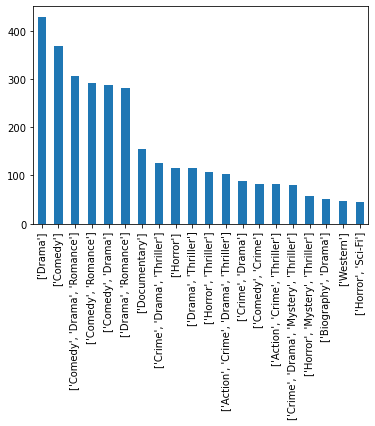

In [101]:
#Graficar el conteo por variable genres
dataTraining.genres.value_counts()[:20].sort_values(ascending=False).plot(kind = 'bar')

### **TfidfVectorizer para las variables *plot*, *title* y *year***

#### **Variable *plot***
Se estandariza el texto de las reseñas, se quitan los signos de puntuación, se convierten todas als letras a minúsculas (lower case), se extrae la raíz de las palabras 

In [145]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')


# Quitar signos de puntuación
for i in range(0,len(punctuation)):
  df['plot'] = df['plot'].str.replace(punctuation[i],'')

#Cambiar por minúsculas
df['plot'] = df['plot'].str.lower()

#Se lematiza (Volvemos al verbo (Significado))
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return ','.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]).replace(',',' ')

#Sacar la raíz de las palabras
def raiz(text):
  return ','.join([stemmer.stem(w) for w in w_tokenizer.tokenize(text)]).replace(',',' ')


df['plot'] = df['plot'].apply(raiz)
df['plot']

0        most is the stori of a singl father who take h...
1        a serial killer decid to teach the secret of h...
2        in sweden a femal blackmail with a disfigur fa...
3        in a friday afternoon in new york the presid o...
4        in los angel the editor of a publish hous caro...
                               ...                        
11263    in bangkok an assassin who turn down a job tha...
11265    eleven separ vignett are present in each celeb...
11269    joey evan is charm handsom funni talent and a ...
11270    when the sing veggi encount some car troubl th...
11275    a genet mutat dog is stolen from the lab of ma...
Name: plot, Length: 11278, dtype: object

Se aplica la función de Tdifvectorizer.

In [167]:
# create a document-term matrix using TF-IDF (Term Frequency-Inverse Document Frequency (TF-IDF))
vect = TfidfVectorizer(   min_df=4, stop_words=propias_stopwords, ngram_range=(1, 2), sublinear_tf='bool' )
dtm = vect.fit_transform(df['plot'])
datatf = pd.DataFrame(vect.fit_transform(df['plot']).toarray(), columns=[str(col)+'_res' for col in vect.get_feature_names()])

dtm_train = datatf.iloc[:len(dataTraining),:]
dtm_test = datatf.iloc[len(dataTraining):,:]

#Lista de palabras - para el ejemplo imprimimos las 100 primeras palabras
print (vect.get_feature_names()[:100])

['abandon', 'abandon boy', 'abandon build', 'abandon famili', 'abandon father', 'abandon hous', 'abandon mother', 'abbey', 'abbi', 'abbott', 'abdomen', 'abduct', 'abductor', 'abe', 'abel', 'abhor', 'abhorr', 'abid', 'abigail', 'abil', 'abil chang', 'abil see', 'abl', 'abl achiev', 'abl carri', 'abl control', 'abl convinc', 'abl eke', 'abl escap', 'abl find', 'abl fulfil', 'abl get', 'abl give', 'abl handl', 'abl infiltr', 'abl keep', 'abl live', 'abl make', 'abl pay', 'abl piec', 'abl provid', 'abl save', 'abl see', 'abl stay', 'abl stop', 'abl surviv', 'abl take', 'abl track', 'abl use', 'abner', 'aboard', 'aboard ship', 'abolish', 'abomin', 'abort', 'abound', 'abov', 'abov ground', 'abra', 'abraham', 'abraham lincoln', 'abram', 'abroad', 'abrupt', 'abscond', 'absenc', 'absent', 'absent father', 'absolut', 'absorb', 'abstract', 'absurd', 'abu', 'abus', 'abus boyfriend', 'abus father', 'abus humili', 'abus husband', 'abus mother', 'abyss', 'academ', 'academi', 'academi award', 'academi

In [106]:
#Suma de frecuencia relativa por token de títulos
df_plot = dtm .toarray().sum(axis=0)
df_plot= pd.DataFrame(df_plot.reshape(1, datatf.shape[1]), columns=vect.get_feature_names())
df_plot=df_plot.transpose()
df_plot.sort_values(by=0, ascending=False)[:10]

,0
find,164.603700
one,161.504835
get,156.169260
life,152.613669
new,138.295808
friend,135.285800
year,128.599419
man,126.997726
love,126.246188
live,125.312159


In [176]:
dtm_train.head()

#### **Variable *TITLE***
El título de las peliculas también puede ser una fuente de datos, se convierten las palabras en minúsculas, se eliminan signos de puntuación, se construye la función para sacar la raíz de las palabras y finalmente se aplica la función de TdifVectorizer.

In [146]:
 # Remplazamos los signos de puntuación (hay casos en los que se tienen signos de puntuación pegados a las palabras)
for i in range(0,len(punctuation)):
  df['title'] = df['title'].str.replace(punctuation[i],'')

#Enviamos todo a minúsculas
df['title'] = df['title'].str.lower()

#Lematizamos (Volvemos al verbo (Significado))
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

#Sacar la raíz de las palabras
def raiz(text):
  return ','.join([stemmer.stem(w) for w in w_tokenizer.tokenize(text)]).replace(',',' ')

df['title'] = df['title'].apply(raiz)
df['title']

0                             most
1        how to be a serial killer
2                     a woman face
3                      execut suit
4                    narrow margin
                   ...            
11263            the fifth command
11265            coff and cigarett
11269                     pal joey
11270         jonah a veggiet movi
11275              man best friend
Name: title, Length: 11278, dtype: object

In [109]:
vect2 = TfidfVectorizer(   min_df=4, stop_words=propias_stopwords, ngram_range=(1, 2), sublinear_tf='bool' )
dtm2 = vect2.fit_transform(df['title'])
datatf2 = pd.DataFrame(vect2.fit_transform(df['title']).toarray(),  columns=[str(col)+'_ti' for col in vect2.get_feature_names()])

dtm_train2 = datatf2.iloc[:len(dataTraining),:]
dtm_test2 = datatf2.iloc[len(dataTraining):,:]

In [169]:
#Lista de palabras en X
print('Lista de palabras en X 1: ', vect2.get_feature_names()[:100])

#Suma de frecuencia relativa por token de títulos
df_title = dtm2.toarray().sum(axis=0)
df_title= pd.DataFrame(df_title.reshape(1, datatf2.shape[1]) , columns=vect2.get_feature_names())
df_title=df_title.transpose()
df_title.sort_values(by=0, ascending=False)[:10]

Lista de palabras en X 1:  ['abbott', 'abbott costello', 'abov', 'academi', 'ace', 'across', 'act', 'action', 'activ', 'adam', 'addict', 'adult', 'adventur', 'affair', 'africa', 'afternoon', 'age', 'air', 'airport', 'alexand', 'ali', 'alic', 'alien', 'aliv', 'alley', 'alon', 'along', 'alway', 'amaz', 'america', 'american', 'american ninja', 'amityvill', 'anatomi', 'angel', 'angri', 'ani', 'anim', 'anna', 'anni', 'anoth', 'anyth', 'apart', 'ape', 'apocalyps', 'arm', 'armi', 'around', 'arrow', 'art', 'arthur', 'artist', 'ass', 'assassin', 'astronaut', 'atlas', 'attack', 'august', 'aveng', 'away', 'babe', 'babi', 'babysitt', 'bachelor', 'back', 'bad', 'bad boy', 'bad news', 'baker', 'ball', 'ballad', 'band', 'bandit', 'bang', 'bank', 'bar', 'barefoot', 'bat', 'batman', 'battl', 'bay', 'beach', 'bear', 'beast', 'beat', 'beauti', 'bee', 'beer', 'befor', 'begin', 'behind', 'believ', 'bell', 'bend', 'beneath', 'best', 'best friend', 'best man', 'better', 'betti']


,0
man,123.979493
love,92.229817
night,74.158537
day,65.931305
girl,64.233883
dead,61.850386
movi,56.201226
last,55.844588
american,53.455775
life,52.648357


In [177]:
dtm_train2.tail()

#### **Concatenamos Título y reseña (title + plot)**

Se crea una nueva variable en la cual se concatena el texto de las variables title y plot en una sola columna. 

Estandarizar el texto de la variable *title + plot*, se convierten las palabras en minúsculas, se eliminan signos de puntuación, se construye la función para sacar la raíz de las palabras y finalmente se aplica la función de TdifVectorizer.



In [147]:

from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()

df['pl_ti'] =df['title']+ ' ' +df['plot'] 
# Remplazamos los signos de puntuación (hay casos en los que se tienen signos de puntuación pegados a las palabras)
for i in range(0,len(punctuation)):
  df['pl_ti'] = df['pl_ti'].str.replace(punctuation[i],'')

#Enviamos todo a minúsculas
df['pl_ti']= df['pl_ti'].str.lower()

#Lematizamos (Volvemos al verbo (Significado))
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemma(text):
    words = text.split() #separa las palabras cada vez que hay un espacio
    return [wordnet_lemmatizer.lemmatize(word) for word in words] #le saca el lema de cada palabra

df['pl_ti']= df['pl_ti'].apply(raiz)
df['pl_ti']

vect3 = TfidfVectorizer( min_df=4, stop_words=propias_stopwords, ngram_range=(1, 2), sublinear_tf='bool' )
tf_transformer = vect3.fit(df['pl_ti'])
dtm3 = vect3.fit_transform(df['pl_ti'])
datatf3 = pd.DataFrame(vect3.fit_transform(df['pl_ti']).toarray(),  columns=vect3.get_feature_names())

dtm_train3 = datatf3.iloc[:len(dataTraining),:]
dtm_test3 = datatf3.iloc[len(dataTraining):,:]
datatf3.head()
datatf3.shape

(11278, 28364)

In [168]:
print('Lista de palabras concatenadas ', vect3.get_feature_names()[:100])

Lista de palabras concatenadas  ['abandon', 'abandon boy', 'abandon build', 'abandon famili', 'abandon father', 'abandon hous', 'abandon mother', 'abbey', 'abbi', 'abbott', 'abbott costello', 'abc', 'abdomen', 'abduct', 'abductor', 'abe', 'abel', 'abhor', 'abhorr', 'abid', 'abigail', 'abil', 'abil chang', 'abil see', 'abl', 'abl achiev', 'abl carri', 'abl control', 'abl convinc', 'abl eke', 'abl escap', 'abl find', 'abl fulfil', 'abl get', 'abl give', 'abl handl', 'abl infiltr', 'abl keep', 'abl live', 'abl make', 'abl pay', 'abl piec', 'abl provid', 'abl save', 'abl see', 'abl stay', 'abl stop', 'abl surviv', 'abl take', 'abl track', 'abl use', 'abner', 'aboard', 'aboard ship', 'abolish', 'abomin', 'abort', 'abound', 'abov', 'abov ground', 'abra', 'abraham', 'abraham lincoln', 'abram', 'abroad', 'abrupt', 'abscond', 'absenc', 'absent', 'absent father', 'absolut', 'absorb', 'abstract', 'absurd', 'abu', 'abus', 'abus boyfriend', 'abus father', 'abus humili', 'abus husband', 'abus mother

#### **Concatenar  bases: *plot, title* y *year***

In [113]:
#Validar el tamaño de cada base
print( 'plott: ', dtm_train.shape, dataTraining.shape)
print( 'plotk: ', dtm_test.shape, datatest.shape)

print( 'titlet: ',dtm_train2.shape, dataTraining.shape)
print( 'titletk: ',dtm_test2.shape, datatest.shape)

print( 'pl_ti: ',dtm_train3.shape, dataTraining.shape)
print( 'pl_ti: ',dtm_test3.shape, datatest.shape)


plott:  (7895, 27946) (7895, 6)
plotk:  (3383, 27946) (3383, 3)
titlet:  (7895, 1381) (7895, 6)
titletk:  (3383, 1381) (3383, 3)
pl_ti:  (7895, 28364) (7895, 6)
pl_ti:  (3383, 28364) (3383, 3)


In [114]:
#Concatenar las variables de plot y title de forma independiente en una sola base

dff= pd.concat([dtm_train, dtm_train2], axis=1, sort=False)
dff.tail()

,abandon_res,abandon boy_res,abandon build_res,abandon famili_res,abandon father_res,abandon hous_res,abandon mother_res,abbey_res,abbi_res,abbott_res,...,yard_ti,year_ti,yellow_ti,yes_ti,york_ti,young_ti,zero_ti,zombi_ti,zone_ti,zorro_ti
7890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
print(dff.shape)

(7895, 29327)


### **Transformación de la variable genres (género) en clases**

In [116]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y = le.fit_transform(dataTraining['genres'])
y.shape

(7895, 24)

In [117]:
print(y.shape)
print(dff.shape)

(7895, 24)
(7895, 29327)


### **Dividir dataset "dataTraining" en entrenamiento y validación"
Crear base de entrenamiento 80% train y 20% validación (test)

In [118]:
#Base con las 2 variables 
X_train, X_test, y_train, y_test = train_test_split(dff, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6316, 29327) (6316, 24)
(1579, 29327) (1579, 24)


In [120]:
#Base únicamente con plot y train concatenado
X_train3, X_test3, y_train3, y_test3 = train_test_split(dtm_train3, y, test_size=0.2, random_state=42)
print(X_train3.shape,y_train3.shape)
print(X_test3.shape,y_test3.shape)

(6316, 28364) (6316, 24)
(1579, 28364) (1579, 24)


### **Entrenar modelo con 80% train y 20% test con plot y title concatenados**
Al entrenar el modelo con 80% train y 20% test, se obtiene un AUC (Ärea bajo la curva)  de 0,904. Usando como input la variable plot y title de forma independiente



In [123]:
#Librerías para crear modelos de regresión logística 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


#regresion logistica
clf = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs')) 


In [151]:
#Entrenamiento del modelo Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor

clfR=OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=200, max_depth=30, random_state=42,oob_score=True))

### **Predicciones y métricas de los modelos con la base completa, con las variables plot y title concatenadas** 




In [134]:
#Modelo logisti Regression
from sklearn import metrics

clf.fit(dtm_train3, y) 


OneVsRestClassifier(estimator=LogisticRegression())

In [171]:
#Predicciones y Área bajo la curva del modelo logístico

from sklearn.metrics import r2_score, roc_auc_score

y_pred = clf.predict_proba(X_test3)
roc_auc_score(y_true = y_test3, y_score = y_pred, average='macro')

#Al subir en la competencia de Kaggle arroja un AUC de 0.90332

0.986943207391064

In [152]:
#Entrenamiento del Modelo Random forest
from sklearn import metrics

clfR.fit(dtm_train3, y)


OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                     n_estimators=200,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=42))

In [153]:
#Predicciones y métricas en modelo RandomForest

y_predR = clfR.predict_proba(X_test3)
roc_auc_score(y_true = y_test3, y_score = y_predR, average='macro')

#Al cargar en Kaggle  arroja un AUC de 0.85407, inferior al modelo logístico

0.9979156457453741

## STACKING

#### Realizaremos un stacking de los modelos logístico y Randomforest

In [155]:
# Importar librería para stacking
from sklearn.ensemble import VotingClassifier


In [156]:
#stacking, se realizará por ponderación de acuerdo con el desempeño de cada modelo
stack=(y_pred*0.8)+(y_predR*0.2)

In [157]:
stack #revisar el contenido del objeto

array([[0.11700496, 0.09801267, 0.02405725, ..., 0.17929628, 0.02687212,
        0.01992572],
       [0.08208316, 0.05228463, 0.0217083 , ..., 0.40371286, 0.02137501,
        0.0164672 ],
       [0.05343902, 0.06518752, 0.02195267, ..., 0.41004102, 0.02262183,
        0.01838742],
       ...,
       [0.09822157, 0.16557953, 0.04305729, ..., 0.14756052, 0.02898514,
        0.02339216],
       [0.07770628, 0.24921882, 0.12370311, ..., 0.19298701, 0.03002321,
        0.01833024],
       [0.10983045, 0.43008385, 0.16509341, ..., 0.09432584, 0.03204518,
        0.03759555]])

In [158]:
roc_auc_score(y_true = y, y_score = stack, average='macro')

0.9909676450560166

### **Predicciones en data set dataTesting**

Correr modelos de regresiones logística y RandomForest en la base completa, con el cual se obtiene un resultado de 0,9978 en el promedio del AUC.

In [172]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres =clf.predict_proba(dtm_test3)

#y_pred_test_genresR =clfR.predict_proba(dtm_test3)

In [173]:
res = pd.DataFrame((y_pred_test_genres), index=datatest.index, columns=cols)

#res = pd.DataFrame((0.8*y_pred_test_genres)+(0.2*y_pred_test_genresR), index=datatest.index, columns=cols)

In [162]:
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.103182,0.094940,0.026240,0.028024,0.345382,0.129558,0.028595,0.589678,0.057647,0.087261,...,0.029393,0.101850,0.000687,0.424718,0.052820,0.018537,0.021521,0.182143,0.021471,0.023553
4,0.130899,0.047418,0.026007,0.144918,0.259407,0.254698,0.062974,0.734120,0.046714,0.036939,...,0.028507,0.046171,0.006798,0.094613,0.030037,0.010805,0.031058,0.247452,0.049415,0.021194
5,0.080178,0.038497,0.013936,0.050263,0.126872,0.547498,0.026605,0.777160,0.029592,0.040444,...,0.017868,0.312421,0.000710,0.181922,0.042420,0.007301,0.026159,0.518599,0.034090,0.016666
6,0.123272,0.092607,0.022716,0.046199,0.185175,0.099109,0.028169,0.686064,0.053400,0.050159,...,0.029640,0.084925,0.000713,0.219550,0.094690,0.007939,0.025449,0.322597,0.064099,0.022611
7,0.080590,0.085156,0.035136,0.031616,0.244133,0.104814,0.038413,0.276935,0.064065,0.113125,...,0.027588,0.097836,0.000695,0.117618,0.397829,0.010303,0.016594,0.281373,0.017628,0.018340


In [174]:
res.to_csv('Grupo2_logit2.csv', index_label='ID')


### Conclusiones

1. Despúes de realizar el ejercicio completo, observamos que el pre-procesamiento de los datos es fundamental para el buen desempeños de los modelos, de manera tal que al limpiar los datos con la función de "stopwords" los modelos mejoraron significativamente. Adicionalmente, al incuir las dos variables predictoras (title + plot) se incrementaron las métricas de desempeño.

2. Se realizaron varios modelos: Logístico, LSTM, XGBoost y Randomforest.  Donde el mejor desempeño del AUC en test de la dataTraining correspondió al modelo Logístico (0.9871041705827245) y Randomforest (0.9979156457453741); sin embargo, al subirlo el archivo de test a Kaggle, el que mejor predicción produjo fue el modelo logístico con 0.90332

3. Finalmente, realizamos un stacking con el modelo logistic y Randomforest; sin embargo, el resultado no superó al modelo logístico.